# Advanced fMRI data analysis 
## fMRI data manipulation and plotting in Python

In this assignment, your task is to complete a few exercises related to data manipulation and plotting in Python.

You can choose to answer in Polish or English (it will not affect your grade).


**DEADLINE:** 10-04-2020

--------------------


**1. Find a one scientific article reporting fMRI findings (search via google Scholar, PubMed). In a paragraph describing fMRI data acquisition, find details about MRI/fMRI scanning parameters such as TR, voxel size, slice thickness, field of view, matrix size, and number of volumes. Fill the information below:**

Article (Authors, year, title, journal): ...


*Structural scan (T1):*

- voxel size = ...
- slice thicknes = ...
- FOV = ...
- matrix size = ...

*Functional scan (T2*):*
- TR = ...
- voxel size = ... 
- slice thicknes = ...
- FOV = ...
- matrix size = ... 
- number of volumes = ... 

**2. Find a portrait photo (.jpg) of your favourite TV series or movie character (head and shoulders) and complete exercises.**

- Crop a photo using online tool (https://www.iloveimg.com/crop-image) to size 400 x 400 (face has to be in the center of image)
- Manipulate the image in python (fill code below)

(400, 400)
<class 'numpy.ndarray'>


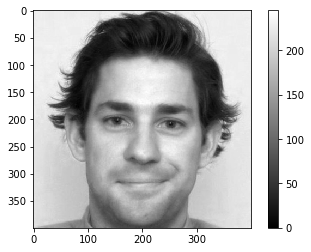

In [7]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image 
image = mpimg.imread('images/jim_img.jpeg')

# Create a new variable containing only the first (RED) channel of image (e.g. new_image = image[:,:,0])
red = image[:,:,0]

# Print shape and type of the image
print(red.shape)
print(type(red))

# Plot the new image using plt.imshow with changed cmap and colorbar
plt.imshow(red, cmap="gray")
plt.colorbar()

# Save the new image as numpy array (use np.save())
np.save("data/jim_array.npy", image)


Example solution: 

<img style="float: left" img src="images/screenshot_solution.png" width="300" >


**3. Load structural (T1) MRI image in python and visualize a one sagittal brain section that nicely presents the hippocampus.**

(193, 229, 193)
<class 'nibabel.nifti1.Nifti1Image'>


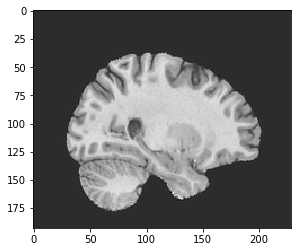

In [97]:
# Load libraries
import nibabel as nib
from nilearn import plotting, image
import numpy as np

# Load MRI image in python (.nii file in "data" folder)
mri_path = "data/ants_t1_to_mni_Warped.nii"
mri = image.load_img(mri_path)

# Print shape and type of the image
print(mri.shape)
print(type(mri))

# Plot sagittal section of the MRI image presenting the hippocampus
mri_array = mri.get_fdata()

sagittal = np.rot90(mri_array[123,:,:])
plt.imshow(sagittal, cmap="gray")

**4. Use pandas to load the most recent Covid-19 data (the cumulative number of deaths) in .csv format (https://github.com/nicebread/corona/tree/master/data/CSSE_data; e.g. CSSE_deaths_2020-03-26.csv) and visualize *timeseries* from 5 selected countries.** 


In [26]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load .csv data frame in python 
corona_pathfile = "data/CSSE_deaths_2020-03-26.txt"
corona = pd.read_csv(corona_pathfile, delimiter=",")

# Print first 5 rows of data
corona.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Group by country & sum cases
corona_grouped = corona.groupby("Country/Region").sum()

# Print last 5 rows of grouped data
corona_grouped.tail()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vietnam,16.0000,108.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


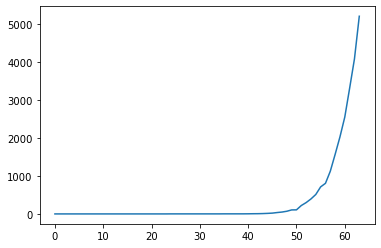

In [43]:
# Write a simple loop (or a function) that plots cumulative deaths from 5 selected countries
def group(clist):
    sum = 0
    for c in clist:
        country = corona_grouped.loc[c].values[2:]
        sum += country
    plt.plot(sum)

list = ["Poland", "Germany", "France", "Spain", "Zimbabwe"]
group(list)



**5*. (optional; for magical points) Use MRI/fMRI data to create a visualization for a logo of our "Advanced fMRI analysis" course GitHub page (https://github.com/fMRIAnalysisCourse)**

In [24]:
# Optional code

